In [56]:
import os, sys
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

In [57]:
from utilities import load_arff_data
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
df = load_arff_data('../new_streams/Split5.arff')
print(f"Rozmiar danych: {df.shape}")

Rozmiar danych: (200000, 5)


In [59]:
first_5k = df.head(5000)
last_5k = df.tail(5000)

In [60]:
first_5k_pca = PCA(n_components=2).fit_transform(first_5k)
last_5k_pca = PCA(n_components=2).fit_transform(last_5k)

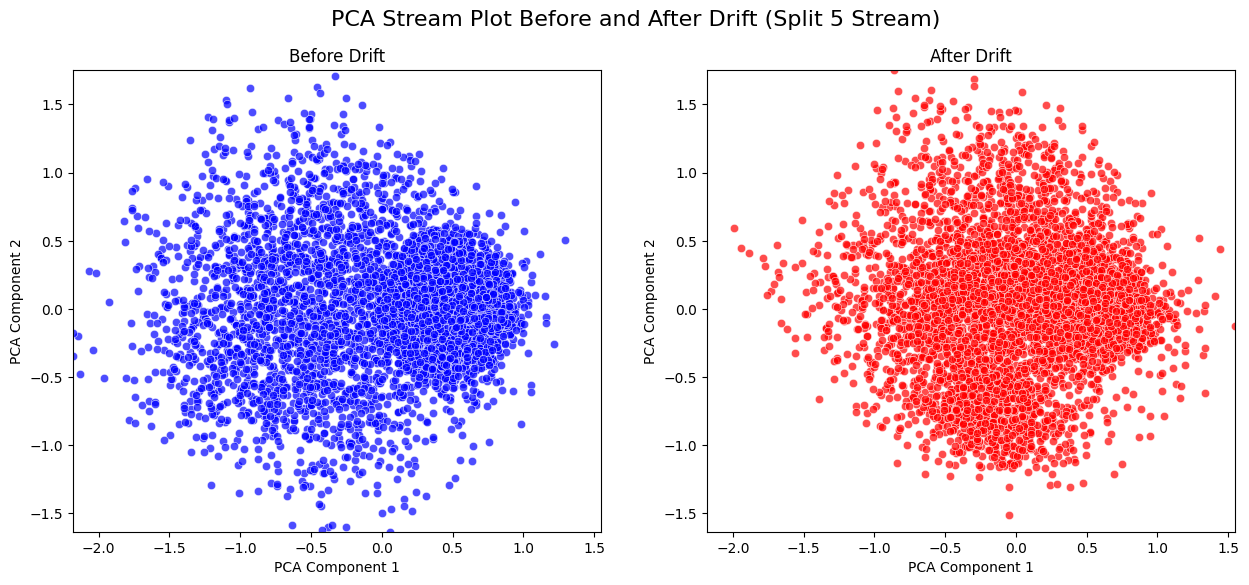

In [61]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Calculate global axis limits
all_x = np.concatenate([first_5k_pca[:, 0], last_5k_pca[:, 0]])
all_y = np.concatenate([first_5k_pca[:, 1], last_5k_pca[:, 1]])
x_min, x_max = all_x.min(), all_x.max()
y_min, y_max = all_y.min(), all_y.max()

# Plot first 5k points (before drift)
sns.scatterplot(
    x=first_5k_pca[:, 0],
    y=first_5k_pca[:, 1],
    color='blue',
    alpha=0.7,
    ax=ax1
)
ax1.set_title('Before Drift')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Plot last 5k points (after drift)
sns.scatterplot(
    x=last_5k_pca[:, 0],
    y=last_5k_pca[:, 1],
    color='red',
    alpha=0.7,
    ax=ax2
)
ax2.set_title('After Drift')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)

# plt.tight_layout()
plt.suptitle('PCA Stream Plot Before and After Drift (Split 5 Stream)', fontsize=16)
plt.savefig('stream_plot_split5.pdf', dpi=300, bbox_inches='tight')
plt.show()